In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./dataset/laptop-price-prediction/train.csv', index_col='Id')
test = pd.read_csv('./dataset/laptop-price-prediction/test.csv', index_col='Id')

In [3]:
df = pd.concat([train, test])
df

,Fabricante,Tipo,Pulgadas,ScreenResolution,CPU,RAM,Disco,GPU,OS,Peso,Precio
Id,,,,,,,,,,,
0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.84kg,747.0
1,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Nvidia GeForce MX150,Windows 10,2.2kg,422.0
2,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,500GB HDD,AMD Radeon 530,Windows 10,2.1kg,422.0
3,Acer,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.4kg,237.0
4,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,337.0
...,...,...,...,...,...,...,...,...,...,...,...
1295,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,NaN
1296,Huawei,Ultrabook,13.0,IPS Panel Full HD 2160x1440,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.05kg,NaN
1297,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.91kg,NaN


## RAM, Peso 전처리

In [4]:
df['RAM'] = df['RAM'].str.replace('GB','').astype(int)

In [5]:
df['Peso'] = df['Peso'].str.replace('kg','').astype(float)

## Fabricante(제조사) 원핫인코딩

df2 = pd.get_dummies(df["Fabricante"])
df2

## GPU원핫인코딩
- 중간에 공백표시때문에 같은 그래픽인데 나뉜거 1개 있어서 str.strip()으로 합쳐줌
- 수량 6개 이하는 etc

In [7]:
df["GPU"] = df["GPU"].str.strip()

In [8]:
df_GPU = df["GPU"].value_counts()
df_GPU

Intel HD Graphics 620      282
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon Pro 455           1
AMD Radeon R5 M315           1
AMD Radeon Pro 560           1
AMD Radeon R9 M385           1
Intel Iris Pro Graphics      1
Name: GPU, Length: 106, dtype: int64

In [9]:
df["GPU_etc"] = df["GPU"]

In [10]:
GPUetc = df_GPU[df["GPU"].value_counts() < 7].index
GPUetc

Index(['Nvidia GeForce 920M', 'Nvidia GeForce 930M', 'Nvidia GeForce GTX 1080',
       'Nvidia GeForce MX130', 'AMD Radeon R5 M330', 'Nvidia GeForce GT 940MX',
       'Nvidia Quadro M620', 'Intel HD Graphics 6000', 'AMD Radeon RX 580',
       'AMD Radeon R7 M440', 'Nvidia GeForce GTX 970M',
       'AMD Radeon R4 Graphics', 'AMD Radeon R2', 'Nvidia GeForce GTX 965M',
       'Intel HD Graphics 510', 'Nvidia Quadro M1000M',
       'AMD Radeon R2 Graphics', 'Intel HD Graphics 630',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 550', 'AMD Radeon R4',
       'AMD Radeon R5 M420X', 'Nvidia GeForce GTX 1050M',
       'Nvidia Quadro M2200M', 'Nvidia GeForce 150MX', 'AMD FirePro W4190M',
       'Nvidia GeForce GTX 960<U+039C>', 'Intel HD Graphics 5300',
       'Intel Iris Plus Graphics 650', 'Nvidia GeForce GTX 1050Ti',
       'Nvidia Quadro M2000M', 'AMD Radeon RX 540', 'Nvidia GeForce GTX 960',
       'AMD Radeon R7 M460', 'Intel Iris Graphics 540', 'Nvidia Quadro M2200',
       'Nvidia Qu

In [11]:
df.loc[df["GPU"].isin(GPUetc), "GPU_etc"] = 'etc'

In [12]:
df3 = pd.get_dummies(df["GPU_etc"])

## Tipo(노트북종류) 원핫인코딩

In [14]:
df4 = pd.get_dummies(df['Tipo'])
df4

,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
Id,,,,,,
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
1295,0,0,0,1,0,0
1296,0,0,0,0,1,0
1297,0,0,0,1,0,0


## Disco 원핫인 
- 5개 미만 etc

In [32]:
df_Disco = df["Disco"].value_counts()
df_Disco

256GB SSD                        412
1TB HDD                          222
500GB HDD                        131
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
512GB SSD +  1TB HDD              14
64GB Flash Storage                14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
64GB SSD                           1
1

In [37]:
df_Disco[df["Disco"].value_counts() <= 5]

180GB SSD                        5
128GB Flash Storage              4
512GB SSD +  2TB HDD             3
16GB SSD                         3
512GB Flash Storage              2
1TB SSD +  1TB HDD               2
128GB SSD +  2TB HDD             2
256GB SSD +  256GB SSD           2
256GB SSD +  500GB HDD           2
64GB SSD                         1
1TB HDD +  1TB HDD               1
512GB SSD +  512GB SSD           1
32GB HDD                         1
64GB Flash Storage +  1TB HDD    1
512GB SSD +  256GB SSD           1
508GB Hybrid                     1
128GB HDD                        1
240GB SSD                        1
512GB SSD +  1.0TB Hybrid        1
1.0TB HDD                        1
256GB SSD +  1.0TB Hybrid        1
8GB SSD                          1
Name: Disco, dtype: int64

In [48]:
Disco_etc = df_Disco[df["Disco"].value_counts() <= 5].index
Disco_etc

Index(['180GB SSD', '128GB Flash Storage', '512GB SSD +  2TB HDD', '16GB SSD',
       '512GB Flash Storage', '1TB SSD +  1TB HDD', '128GB SSD +  2TB HDD',
       '256GB SSD +  256GB SSD', '256GB SSD +  500GB HDD', '64GB SSD',
       '1TB HDD +  1TB HDD', '512GB SSD +  512GB SSD', '32GB HDD',
       '64GB Flash Storage +  1TB HDD', '512GB SSD +  256GB SSD',
       '508GB Hybrid', '128GB HDD', '240GB SSD', '512GB SSD +  1.0TB Hybrid',
       '1.0TB HDD', '256GB SSD +  1.0TB Hybrid', '8GB SSD'],
      dtype='object')

In [49]:
df["Disco_etc"] = df["Disco"]

In [50]:
df.loc[df["Disco"].isin(Disco_etc) ,"Disco_etc"] = 'Disco_etc'

In [51]:
df["Disco_etc"].value_counts()

256GB SSD               412
1TB HDD                 222
500GB HDD               131
512GB SSD               118
128GB SSD +  1TB HDD     94
128GB SSD                76
256GB SSD +  1TB HDD     73
32GB Flash Storage       38
Disco_etc                38
2TB HDD                  16
64GB Flash Storage       14
512GB SSD +  1TB HDD     14
1TB SSD                  14
256GB SSD +  2TB HDD     10
1.0TB Hybrid              9
256GB Flash Storage       8
16GB Flash Storage        7
32GB SSD                  6
Name: Disco_etc, dtype: int64

In [52]:
df5 = pd.get_dummies(df["Disco_etc"])
df5

,1.0TB Hybrid,128GB SSD,128GB SSD + 1TB HDD,16GB Flash Storage,1TB HDD,1TB SSD,256GB Flash Storage,256GB SSD,256GB SSD + 1TB HDD,256GB SSD + 2TB HDD,2TB HDD,32GB Flash Storage,32GB SSD,500GB HDD,512GB SSD,512GB SSD + 1TB HDD,64GB Flash Storage,Disco_etc
Id,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1297,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [53]:
df5.columns

Index(['1.0TB Hybrid', '128GB SSD', '128GB SSD +  1TB HDD',
       '16GB Flash Storage', '1TB HDD', '1TB SSD', '256GB Flash Storage',
       '256GB SSD', '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '2TB HDD',
       '32GB Flash Storage', '32GB SSD', '500GB HDD', '512GB SSD',
       '512GB SSD +  1TB HDD', '64GB Flash Storage', 'Disco_etc'],
      dtype='object')

## CPU 원핫인코딩
- 8개 이하 etc

In [74]:
df_cpu = df["CPU"].value_counts()
df_cpu

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.50GHz        1
Intel Core i3 6006U 2.2GHz         1
Samsung Cortex A72&A53 2.0GHz      1
AMD E-Series 6110 1.5GHz           1
Intel Core i7 2.2GHz               1
Name: CPU, Length: 118, dtype: int64

In [191]:
df_cpu[df["CPU"].value_counts() > 8]

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
Intel Core i5 6200U 2.3GHz               68
Intel Core i3 6006U 2GHz                 64
Intel Core i7 6500U 2.5GHz               48
Intel Core i7 6700HQ 2.6GHz              43
Intel Core i3 7100U 2.4GHz               37
Intel Core i5 7300HQ 2.5GHz              33
Intel Celeron Dual Core N3350 1.1GHz     30
Intel Celeron Dual Core N3060 1.6GHz     28
Intel Core i7 6600U 2.6GHz               18
Intel Core i3 6006U 2.0GHz               16
Intel Pentium Quad Core N4200 1.1GHz     14
Intel Core i5 7300U 2.6GHz               14
Intel Core i7 7600U 2.8GHz               13
Intel Pentium Quad Core N3710 1.6GHz     11
Intel Core i5 6300U 2.4GHz               11
AMD A9-Series 9420 3GHz                  11
Intel Core i7 6820HK 2.7GHz              10
Intel Core i3 6100U 2.3GHz      

In [89]:
CPU_etc = df_cpu[df["CPU"].value_counts() <= 8].index

In [92]:
df["CPU_etc"] = df["CPU"]
df.loc[df["CPU"].isin(CPU_etc), "CPU_etc"] = "cpu_etc"

In [94]:
df["CPU_etc"].value_counts()

cpu_etc                                 198
Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
Intel Core i5 6200U 2.3GHz               68
Intel Core i3 6006U 2GHz                 64
Intel Core i7 6500U 2.5GHz               48
Intel Core i7 6700HQ 2.6GHz              43
Intel Core i3 7100U 2.4GHz               37
Intel Core i5 7300HQ 2.5GHz              33
Intel Celeron Dual Core N3350 1.1GHz     30
Intel Celeron Dual Core N3060 1.6GHz     28
Intel Core i7 6600U 2.6GHz               18
Intel Core i3 6006U 2.0GHz               16
Intel Core i5 7300U 2.6GHz               14
Intel Pentium Quad Core N4200 1.1GHz     14
Intel Core i7 7600U 2.8GHz               13
Intel Pentium Quad Core N3710 1.6GHz     11
AMD A9-Series 9420 3GHz                  11
Intel Core i5 6300U 2.4GHz               11
Intel Core i7 6820HK 2.7GHz     

In [95]:
df6 = pd.get_dummies(df["CPU_etc"])
df6

,AMD A9-Series 9420 3GHz,Intel Celeron Dual Core N3050 1.6GHz,Intel Celeron Dual Core N3060 1.6GHz,Intel Celeron Dual Core N3350 1.1GHz,Intel Core i3 6006U 2.0GHz,Intel Core i3 6006U 2GHz,Intel Core i3 6100U 2.3GHz,Intel Core i3 7100U 2.4GHz,Intel Core i5 6200U 2.3GHz,Intel Core i5 6300U 2.4GHz,...,Intel Core i7 6600U 2.6GHz,Intel Core i7 6700HQ 2.6GHz,Intel Core i7 6820HK 2.7GHz,Intel Core i7 7500U 2.7GHz,Intel Core i7 7600U 2.8GHz,Intel Core i7 7700HQ 2.8GHz,Intel Core i7 8550U 1.8GHz,Intel Pentium Quad Core N3710 1.6GHz,Intel Pentium Quad Core N4200 1.1GHz,cpu_etc
Id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df6.columns

Index(['AMD A9-Series 9420 3GHz', 'Intel Celeron Dual Core N3050 1.6GHz',
       'Intel Celeron Dual Core N3060 1.6GHz',
       'Intel Celeron Dual Core N3350 1.1GHz', 'Intel Core i3 6006U 2.0GHz',
       'Intel Core i3 6006U 2GHz', 'Intel Core i3 6100U 2.3GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Core i5 6200U 2.3GHz',
       'Intel Core i5 6300U 2.4GHz', 'Intel Core i5 7200U 2.5GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'Intel Core i5 7300U 2.6GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i7 6500U 2.5GHz',
       'Intel Core i7 6600U 2.6GHz', 'Intel Core i7 6700HQ 2.6GHz',
       'Intel Core i7 6820HK 2.7GHz', 'Intel Core i7 7500U 2.7GHz',
       'Intel Core i7 7600U 2.8GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i7 8550U 1.8GHz', 'Intel Pentium Quad Core N3710 1.6GHz',
       'Intel Pentium Quad Core N4200 1.1GHz', 'cpu_etc'],
      dtype='object')

## OS 원핫인코딩

In [136]:
df7 = pd.get_dummies(df["OS"])
df7

,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
Id,,,,,,,,,
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1295,0,0,0,0,0,1,0,0,0
1296,0,0,0,0,0,1,0,0,0
1297,0,0,0,0,0,1,0,0,0


In [138]:
df7.columns

Index(['Android', 'Chrome OS', 'Linux', 'Mac OS X', 'No OS', 'Windows 10',
       'Windows 10 S', 'Windows 7', 'macOS'],
      dtype='object')

## ScreenResolution 원핫인코딩
- 3개이하 etc

In [160]:
df_Scr = df["ScreenResolution"].value_counts()

In [192]:
df_Scr[df["ScreenResolution"].value_counts() > 3]

Full HD 1920x1080                                507
1366x768                                         278
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Touchscreen 2560x1440               

In [166]:
df_Scr_etc = df_Scr[df["ScreenResolution"].value_counts() <= 3].index
df_Scr_etc

Index(['IPS Panel Touchscreen 1366x768', 'Quad HD+ 3200x1800', '2560x1440',
       '1920x1080', 'IPS Panel Quad HD+ 2560x1440', 'Touchscreen 2400x1600',
       'IPS Panel Quad HD+ 3200x1800', 'IPS Panel Full HD 2160x1440',
       'IPS Panel Touchscreen / 4K Ultra HD 3840x2160',
       'IPS Panel Retina Display 2736x1824', 'IPS Panel Touchscreen 2400x1600',
       'Touchscreen / 4K Ultra HD 3840x2160',
       'Touchscreen / Full HD 1920x1080', 'IPS Panel Full HD 1920x1200',
       'IPS Panel Full HD 2560x1440', 'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Full HD 1366x768'],
      dtype='object')

In [165]:
df["SCR_etc"] = df["ScreenResolution"]

In [168]:
df.loc[df["ScreenResolution"].isin(df_Scr_etc), "SCR_etc"] = "scr_etc"

In [169]:
df["SCR_etc"].value_counts()

Full HD 1920x1080                                507
1366x768                                         278
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
scr_etc                                           32
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2304x1440            

In [170]:
df8 = pd.get_dummies(df["SCR_etc"])
df8

,1366x768,1440x900,1600x900,4K Ultra HD / Touchscreen 3840x2160,4K Ultra HD 3840x2160,Full HD / Touchscreen 1920x1080,Full HD 1920x1080,IPS Panel 1366x768,IPS Panel 2560x1440,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,...,IPS Panel Retina Display 2304x1440,IPS Panel Retina Display 2560x1600,IPS Panel Retina Display 2880x1800,IPS Panel Touchscreen 1920x1200,IPS Panel Touchscreen 2560x1440,Quad HD+ / Touchscreen 3200x1800,Touchscreen 1366x768,Touchscreen 2256x1504,Touchscreen 2560x1440,scr_etc
Id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1297,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
df8.columns

Index(['1366x768', '1440x900', '1600x900',
       '4K Ultra HD / Touchscreen 3840x2160', '4K Ultra HD 3840x2160',
       'Full HD / Touchscreen 1920x1080', 'Full HD 1920x1080',
       'IPS Panel 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel 4K Ultra HD 3840x2160',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'IPS Panel Full HD 1920x1080',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Retina Display 2560x1600',
       'IPS Panel Retina Display 2880x1800', 'IPS Panel Touchscreen 1920x1200',
       'IPS Panel Touchscreen 2560x1440', 'Quad HD+ / Touchscreen 3200x1800',
       'Touchscreen 1366x768', 'Touchscreen 2256x1504',
       'Touchscreen 2560x1440', 'scr_etc'],
      dtype='object')

## 원핫인코딩한거 다 concat하고 train test 분리
- 먼저 data를 train.index / test.index로 나누고 feature_names로 인덱싱해서 쓸 컬럼만 가져옴
- y-train은 precio만 붙임

In [172]:
data =pd.concat([df, df2, df3, df4, df5, df6, df7, df8], axis=1)
data.head()

,Fabricante,Tipo,Pulgadas,ScreenResolution,CPU,RAM,Disco,GPU,OS,Peso,...,IPS Panel Retina Display 2304x1440,IPS Panel Retina Display 2560x1600,IPS Panel Retina Display 2880x1800,IPS Panel Touchscreen 1920x1200,IPS Panel Touchscreen 2560x1440,Quad HD+ / Touchscreen 3200x1800,Touchscreen 1366x768,Touchscreen 2256x1504,Touchscreen 2560x1440,scr_etc
Id,,,,,,,,,,,,,,,,,,,,,
0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.84,...,0,0,0,0,0,0,0,0,0,0
1,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Nvidia GeForce MX150,Windows 10,2.20,...,0,0,0,0,0,0,0,0,0,0
2,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,500GB HDD,AMD Radeon 530,Windows 10,2.10,...,0,0,0,0,0,0,0,0,0,0
3,Acer,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.40,...,0,0,0,0,0,0,0,0,0,0
4,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data.columns

Index(['Fabricante', 'Tipo', 'Pulgadas', 'ScreenResolution', 'CPU', 'RAM',
       'Disco', 'GPU', 'OS', 'Peso', 'Precio', 'GPU_etc', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi', 'AMD Radeon 520', 'AMD Radeon 530', 'AMD Radeon R5',
       'AMD Radeon R5 M420', 'AMD Radeon R5 M430', 'AMD Radeon R7 M445',
       'Intel HD Graphics', 'Intel HD Graphics 400', 'Intel HD Graphics 405',
       'Intel HD Graphics 500', 'Intel HD Graphics 505',
       'Intel HD Graphics 515', 'Intel HD Graphics 520',
       'Intel HD Graphics 615', 'Intel HD Graphics 620',
       'Intel Iris Plus Graphics 640', 'Intel UHD Graphics 620',
       'Nvidia GeForce 920MX', 'Nvidia GeForce 930MX', 'Nvidia GeForce 940MX',
       'Nvidia GeForce GTX 1050', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce GTX 1070',
       'Nvidia GeForce GTX

In [174]:
feature_names = ['Fabricante', 'Tipo', 'Pulgadas', 'ScreenResolution', 'CPU', 'RAM',
       'Disco', 'GPU', 'OS', 'Peso', 'Precio', 'GPU_etc', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi', 'AMD Radeon 520', 'AMD Radeon 530', 'AMD Radeon R5',
       'AMD Radeon R5 M420', 'AMD Radeon R5 M430', 'AMD Radeon R7 M445',
       'Intel HD Graphics', 'Intel HD Graphics 400', 'Intel HD Graphics 405',
       'Intel HD Graphics 500', 'Intel HD Graphics 505',
       'Intel HD Graphics 515', 'Intel HD Graphics 520',
       'Intel HD Graphics 615', 'Intel HD Graphics 620',
       'Intel Iris Plus Graphics 640', 'Intel UHD Graphics 620',
       'Nvidia GeForce 920MX', 'Nvidia GeForce 930MX', 'Nvidia GeForce 940MX',
       'Nvidia GeForce GTX 1050', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce GTX 1070',
       'Nvidia GeForce GTX 950M', 'Nvidia GeForce GTX 960M',
       'Nvidia GeForce GTX 980M', 'Nvidia GeForce MX150',
       'Nvidia Quadro M1200', 'etc', '2 in 1 Convertible', 'Gaming', 'Netbook',
       'Notebook', 'Ultrabook', 'Workstation','1.0TB Hybrid', '128GB SSD', '128GB SSD +  1TB HDD',
       '16GB Flash Storage', '1TB HDD', '1TB SSD', '256GB Flash Storage',
       '256GB SSD', '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '2TB HDD',
       '32GB Flash Storage', '32GB SSD', '500GB HDD', '512GB SSD',
       '512GB SSD +  1TB HDD', '64GB Flash Storage', 'Disco_etc', 'AMD A9-Series 9420 3GHz', 'Intel Celeron Dual Core N3050 1.6GHz',
       'Intel Celeron Dual Core N3060 1.6GHz',
       'Intel Celeron Dual Core N3350 1.1GHz', 'Intel Core i3 6006U 2.0GHz',
       'Intel Core i3 6006U 2GHz', 'Intel Core i3 6100U 2.3GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Core i5 6200U 2.3GHz',
       'Intel Core i5 6300U 2.4GHz', 'Intel Core i5 7200U 2.5GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'Intel Core i5 7300U 2.6GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i7 6500U 2.5GHz',
       'Intel Core i7 6600U 2.6GHz', 'Intel Core i7 6700HQ 2.6GHz',
       'Intel Core i7 6820HK 2.7GHz', 'Intel Core i7 7500U 2.7GHz',
       'Intel Core i7 7600U 2.8GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i7 8550U 1.8GHz', 'Intel Pentium Quad Core N3710 1.6GHz',
       'Intel Pentium Quad Core N4200 1.1GHz', 'cpu_etc', 'Android', 'Chrome OS', 'Linux', 'Mac OS X', 'No OS', 'Windows 10',
       'Windows 10 S', 'Windows 7', 'macOS', '1366x768', '1440x900', '1600x900',
       '4K Ultra HD / Touchscreen 3840x2160', '4K Ultra HD 3840x2160',
       'Full HD / Touchscreen 1920x1080', 'Full HD 1920x1080',
       'IPS Panel 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel 4K Ultra HD 3840x2160',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'IPS Panel Full HD 1920x1080',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Retina Display 2560x1600',
       'IPS Panel Retina Display 2880x1800', 'IPS Panel Touchscreen 1920x1200',
       'IPS Panel Touchscreen 2560x1440', 'Quad HD+ / Touchscreen 3200x1800',
       'Touchscreen 1366x768', 'Touchscreen 2256x1504',
       'Touchscreen 2560x1440', 'scr_etc']
feature_names.remove('Precio')
feature_names.remove('OS')
feature_names.remove('CPU')
feature_names.remove('ScreenResolution')
feature_names.remove('Tipo')
feature_names.remove('Fabricante')
feature_names.remove('Disco')
feature_names.remove('GPU')
feature_names.remove('GPU_etc')
feature_names.remove('Disco_etc')
feature_names

['Pulgadas',
 'RAM',
 'Peso',
 'Acer',
 'Apple',
 'Asus',
 'Chuwi',
 'Dell',
 'Fujitsu',
 'Google',
 'HP',
 'Huawei',
 'LG',
 'Lenovo',
 'MSI',
 'Mediacom',
 'Microsoft',
 'Razer',
 'Samsung',
 'Toshiba',
 'Vero',
 'Xiaomi',
 'AMD Radeon 520',
 'AMD Radeon 530',
 'AMD Radeon R5',
 'AMD Radeon R5 M420',
 'AMD Radeon R5 M430',
 'AMD Radeon R7 M445',
 'Intel HD Graphics',
 'Intel HD Graphics 400',
 'Intel HD Graphics 405',
 'Intel HD Graphics 500',
 'Intel HD Graphics 505',
 'Intel HD Graphics 515',
 'Intel HD Graphics 520',
 'Intel HD Graphics 615',
 'Intel HD Graphics 620',
 'Intel Iris Plus Graphics 640',
 'Intel UHD Graphics 620',
 'Nvidia GeForce 920MX',
 'Nvidia GeForce 930MX',
 'Nvidia GeForce 940MX',
 'Nvidia GeForce GTX 1050',
 'Nvidia GeForce GTX 1050 Ti',
 'Nvidia GeForce GTX 1060',
 'Nvidia GeForce GTX 1070',
 'Nvidia GeForce GTX 950M',
 'Nvidia GeForce GTX 960M',
 'Nvidia GeForce GTX 980M',
 'Nvidia GeForce MX150',
 'Nvidia Quadro M1200',
 'etc',
 '2 in 1 Convertible',
 'Gami

In [175]:
label_names = 'Precio'

In [176]:
X_train = data.loc[train.index]
X_train = X_train[feature_names]
X_train.head()

,Pulgadas,RAM,Peso,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,...,IPS Panel Retina Display 2304x1440,IPS Panel Retina Display 2560x1600,IPS Panel Retina Display 2880x1800,IPS Panel Touchscreen 1920x1200,IPS Panel Touchscreen 2560x1440,Quad HD+ / Touchscreen 3200x1800,Touchscreen 1366x768,Touchscreen 2256x1504,Touchscreen 2560x1440,scr_etc
Id,,,,,,,,,,,,,,,,,,,,,
0,15.6,8,1.84,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.6,8,2.20,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.6,4,2.10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.6,4,2.40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15.6,6,2.04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
X_test = data.loc[test.index]
X_test = X_test[feature_names]
X_test.head()

,Pulgadas,RAM,Peso,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,...,IPS Panel Retina Display 2304x1440,IPS Panel Retina Display 2560x1600,IPS Panel Retina Display 2880x1800,IPS Panel Touchscreen 1920x1200,IPS Panel Touchscreen 2560x1440,Quad HD+ / Touchscreen 3200x1800,Touchscreen 1366x768,Touchscreen 2256x1504,Touchscreen 2560x1440,scr_etc
Id,,,,,,,,,,,,,,,,,,,,,
950,15.6,4,2.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
951,15.6,4,1.86,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
952,15.6,8,2.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
953,17.3,8,2.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
954,14.0,4,1.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
y_train = data.loc[train.index][['Precio']]
print(y_train.shape)
y_train

(950, 1)


,Precio
Id,
0,747.0
1,422.0
2,422.0
3,237.0
4,337.0
...,...
945,331.0
946,663.0
947,743.0


## RandomForestRegressor + RandomizedSearchCV


In [179]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_jobs=-1)
model

RandomForestRegressor(n_jobs=-1, random_state=42)

In [180]:
model.fit(X_train, y_train)

C:\Users\이재모\AppData\Local\Temp\ipykernel_6136\180087699.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [181]:
y_predict = model.fit(X_train, y_train).predict(X_test)
print(y_predict.shape)
y_predict[:5]

C:\Users\이재모\AppData\Local\Temp\ipykernel_6136\759431187.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_predict = model.fit(X_train, y_train).predict(X_test)


(350,)


array([306.4       , 218.4       , 723.60666667, 749.7       ,
       557.84333333])

In [182]:
param_distributions = {"max_depth": np.random.randint(15, 30, 10),
"max_features": np.random.uniform(0.8, 1, 10)}

In [183]:
from sklearn.model_selection import RandomizedSearchCV

reg = RandomizedSearchCV(model, param_distributions=param_distributions,
                   n_iter=10, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error', random_state=42)
reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\jemo33\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([20, 16, 18, 22, 16, 19, 26, 17, 18, 15]),
                                        'max_features': array([0.96243915, 0.86490429, 0.87407282, 0.81913562, 0.86271247,
       0.97068023, 0.86076626, 0.9549594 , 0.81889094, 0.9435294 ])},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [184]:
y_predict = reg.best_estimator_.fit(X_train, y_train).predict(X_test)
y_predict.shape

C:\Users\이재모\AppData\Local\Temp\ipykernel_6136\1643887090.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_predict = reg.best_estimator_.fit(X_train, y_train).predict(X_test)


(350,)

## 제출파일만들기

In [185]:
sample = pd.read_csv('./dataset/laptop-price-prediction/sample.csv', index_col="Id")
sample = sample.drop(columns='Unnamed: 0')
sample['Precio'] = (y_predict)
sample['Precio'].head()

Id
950    309.538504
951    219.354999
952    723.858333
953    769.888628
954    553.220833
Name: Precio, dtype: float64

In [190]:
sample.to_csv('./dataset/laptop-price-prediction/11.csv')

## 오차, 예측, r2 스코어

In [186]:
from sklearn.model_selection import cross_val_predict

y_valid_pred = cross_val_predict(reg.best_estimator_, X_train, y_train, n_jobs=-1)
y_valid_pred

array([ 759.66478992,  472.65079843,  383.46674868,  240.80482143,
        337.60875   ,  789.16333333,  738.66222222,  370.35865385,
        180.696     ,  315.78941101, 1021.079     ,  706.27      ,
        801.05846154,  264.04379152,  175.036     ,  749.56846154,
        371.67322581,  253.22290476,  555.08      ,  689.19580586,
        522.61178744,  976.1125    ,  567.98738889,  742.09322454,
       1119.51      ,  794.18222222,  442.24227273,  964.03666667,
        648.21636364,  564.585     ,  342.43269481,  652.56351042,
        915.53      ,  520.12294118,  198.63808333,  574.87760431,
        258.58685185,  531.802     ,  920.74      ,  750.21333333,
        311.97638889,  896.99      ,  429.45      ,  241.18285714,
       1369.0530303 ,  343.623     ,  695.55987229,  811.94333333,
        289.44829922, 1952.48      ,  651.61      ,  429.26996337,
       1434.38      ,  703.03      , 1119.53666667, 1027.79416667,
        691.19428571,  408.29990909, 1285.27636364, 1341.46   

In [187]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_train, y_valid_pred) ** 0.5
rmse

186.74838069867164

<AxesSubplot:xlabel='Precio'>

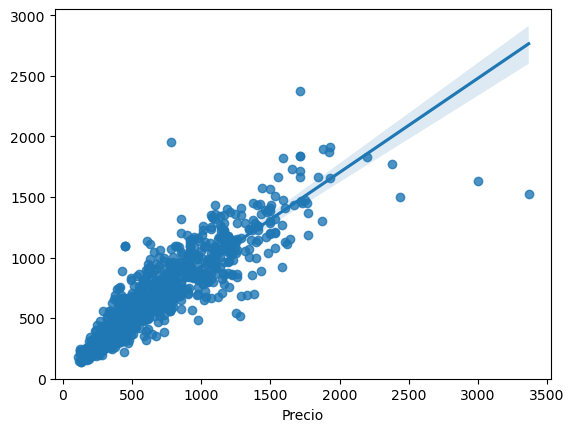

In [188]:
sns.regplot(x=y_train, y=y_valid_pred)

In [189]:
from sklearn.metrics import r2_score

r2_score(y_train, y_valid_pred)

0.7911685840364402